<a href="https://colab.research.google.com/github/mehrotrasan16/Keras-Deep-Learning/blob/03-terneryneuralnets-ASLMNIST/a3_q2_ASLMNIST_ternary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import models,layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tempfile
import zipfile
import os

# Reading and Visualizing Dataset

In [2]:
train_path = '/content/drive/My Drive/Colab Notebooks/CS581/SignLanguageMNIST/sign_mnist_train'
test_path = '/content/drive/My Drive/Colab Notebooks/CS581/SignLanguageMNIST/sign_mnist_test'

In [3]:
import glob
all_train = glob.glob(train_path + "/*.csv") 
all_test = glob.glob(test_path + "/*.csv")
print(all_train,all_test)

['/content/drive/My Drive/Colab Notebooks/CS581/SignLanguageMNIST/sign_mnist_train/sign_mnist_train.csv'] ['/content/drive/My Drive/Colab Notebooks/CS581/SignLanguageMNIST/sign_mnist_test/sign_mnist_test.csv']


In [4]:
traindf = pd.read_csv(all_train[0])
traindf

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,194,193,193,194,194,195,195,196,194,195,196,196,197,196,197,197,196,195,195,189,190,192,192,193,194,195,196,196,196,193,...,115,92,132,173,118,84,53,135,253,213,219,208,82,82,84,85,85,87,84,87,78,113,216,189,172,175,155,131,116,93,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,167,169,169,169,169,169,169,169,169,169,167,167,167,166,165,164,164,163,162,153,156,159,160,162,163,164,165,167,169,172,...,199,200,199,199,198,199,198,197,196,195,195,194,66,67,65,62,61,41,32,37,33,30,28,38,187,202,199,199,199,199,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,173,173,172,171,171,171,170,169,168,166,166,165,165,163,162,161,160,158,156,178,178,177,176,177,177,177,176,176,176,175,...,110,85,90,166,205,207,205,203,202,201,200,198,217,217,217,218,218,211,203,200,189,171,157,145,136,129,128,125,101,77,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,190,191,193,192,191,191,191,191,190,190,189,187,186,184,183,182,181,179,177,179,182,185,187,189,190,192,192,192,192,194,...,190,173,140,80,28,60,70,61,61,78,100,86,136,135,135,135,132,132,136,136,137,144,103,120,197,200,195,196,170,149,119,56,27,58,102,79,47,64,87,93


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


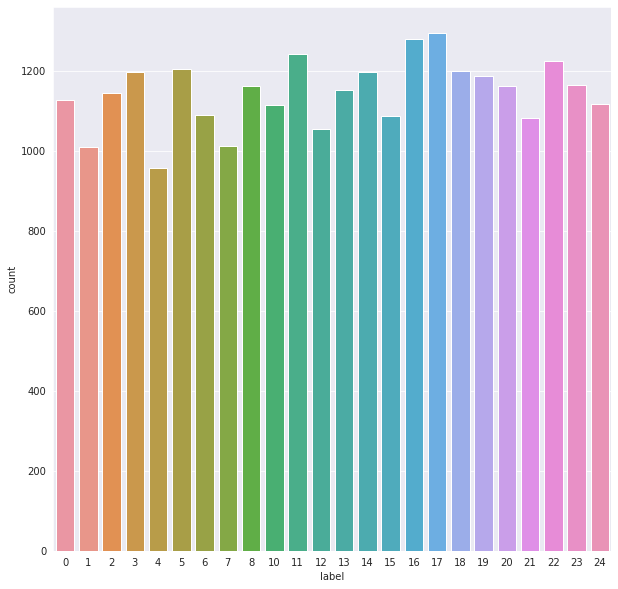

In [5]:
import seaborn as sns
plt.figure(figsize = (10,10)) # Label Count
sns.set_style("darkgrid")
sns.countplot(traindf['label'])

In [6]:
testdf = pd.read_csv(all_test[0])
testdf

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,133,143,148,156,160,162,164,168,171,173,175,178,179,181,182,184,185,185,186,137,116,111,101,110,92,66,108,124,132,155,...,147,132,115,112,117,118,112,153,189,178,173,166,140,121,157,125,93,99,100,101,104,100,118,167,154,141,136,139,135,125,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,176,176,176,178,176,176,178,177,176,178,178,177,176,176,176,174,174,173,173,159,163,164,166,168,169,173,175,177,178,177,...,90,78,191,215,212,214,212,209,209,208,208,207,189,192,196,199,191,208,230,201,197,185,184,187,169,136,131,107,69,127,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,192,193,192,191,192,191,191,192,189,189,189,188,188,188,187,186,185,184,183,193,193,193,193,193,193,194,194,193,195,195,...,215,215,215,214,213,213,212,212,210,209,208,207,215,215,207,207,208,207,203,196,170,99,92,92,89,155,213,216,216,216,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,229,234,233,233,237,237,237,240,241,238,240,240,242,243,241,239,239,239,239,206,209,212,215,218,220,223,226,227,229,236,...,168,173,128,127,255,255,255,255,159,99,80,77,255,255,255,255,255,255,231,255,255,255,255,255,249,231,188,164,169,176,112,169,255,255,237,113,91,67,70,63


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


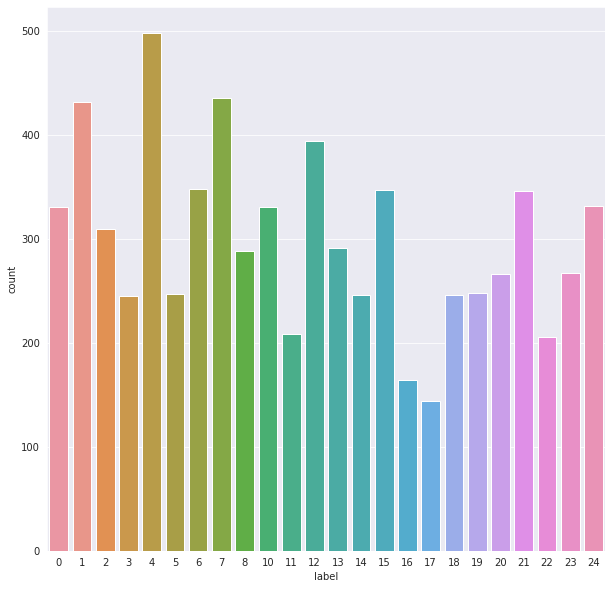

In [7]:
import seaborn as sns
plt.figure(figsize = (10,10)) # Label Count
sns.set_style("darkgrid")
sns.countplot(testdf['label'])

In [8]:
y_train = traindf['label']
y_test = testdf['label']
del(traindf['label'])
del(testdf['label'])

In [9]:
x_train = traindf.values
x_test = testdf.values

In [10]:
y_train.shape, y_test.shape

((27455,), (7172,))

In [11]:
x_train.shape, x_test.shape

((27455, 784), (7172, 784))

In [12]:
# Normalize the data
x_train, x_test = x_train / 255, x_test / 255

In [13]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's
x_train = x_train.reshape(-1,28,28)
x_test = x_test.reshape(-1,28,28)

In [14]:
class_names = [chr(a) for a in range(ord('a'),ord('z'))]
class_names

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y']

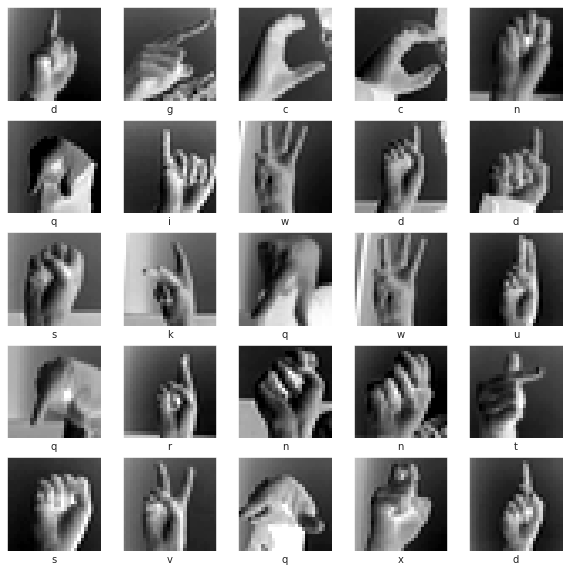

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [16]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [17]:
x_train.shape, x_test.shape

((27455, 28, 28, 1), (7172, 28, 28, 1))

# Ternary Layer Model

In [18]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [21]:
import ternary_layers as tl
import ternary_ops as to

In [22]:
model = models.Sequential([
tl.TernaryConv2D(64, kernel_size=(3,3), padding='same', activation='relu',use_bias=False),
layers.MaxPool2D(pool_size=(2,2)),
layers.BatchNormalization(center=True, scale=False),
tl.TernaryConv2D(64, kernel_size=(3,3), padding='same', activation='relu',use_bias=False),
layers.MaxPool2D(pool_size=(2,2)),
layers.BatchNormalization(center=True, scale=False),
layers.Flatten(),
tl.TernaryDense(128, activation='relu',use_bias=False),
layers.Dropout(0.60),
layers.Dense(25,use_bias=False)
])

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=150,
                    batch_size=128,
                    validation_data=(x_test, y_test))

Epoch 1/150
215/215 [==============================] - 1s 7ms/step - loss: 20.0134 - accuracy: 0.1225 - val_loss: 4.8831 - val_accuracy: 0.1390
Epoch 2/150
215/215 [==============================] - 1s 6ms/step - loss: 3.4127 - accuracy: 0.1345 - val_loss: 3.0404 - val_accuracy: 0.1859
Epoch 3/150
215/215 [==============================] - 1s 5ms/step - loss: 2.9682 - accuracy: 0.1646 - val_loss: 2.9110 - val_accuracy: 0.2285
Epoch 4/150
215/215 [==============================] - 1s 5ms/step - loss: 2.7513 - accuracy: 0.2018 - val_loss: 2.6799 - val_accuracy: 0.2447
Epoch 5/150
215/215 [==============================] - 1s 6ms/step - loss: 2.5011 - accuracy: 0.2528 - val_loss: 3.0038 - val_accuracy: 0.3338
Epoch 6/150
215/215 [==============================] - 1s 5ms/step - loss: 2.2631 - accuracy: 0.3017 - val_loss: 2.3382 - val_accuracy: 0.3905
Epoch 7/150
215/215 [==============================] - 1s 5ms/step - loss: 2.0496 - accuracy: 0.3511 - val_loss: 2.2367 - val_accuracy: 0.434

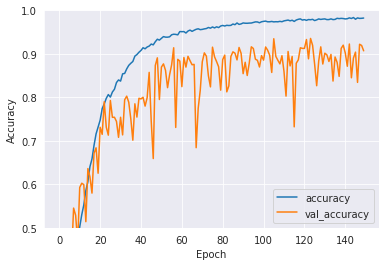

225/225 - 0s - loss: 1.3708 - accuracy: 0.9070


In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

# Saving the Model

In [25]:
saved_model_dir = '/content/drive/My Drive/Colab Notebooks/CS581/assignment3/sign_mnist_ternary.h5'
print(f"Saving Model to: {saved_model_dir}")
tf.keras.models.save_model(model,saved_model_dir,include_optimizer=False)

Saving Model to: /content/drive/My Drive/Colab Notebooks/CS581/assignment3/sign_mnist_ternary.h5


In [26]:
saved_model_zip = '/content/drive/My Drive/Colab Notebooks/CS581/assignment3/final_ternary_model.zip'
with zipfile.ZipFile(saved_model_zip,'w',compression=zipfile.ZIP_DEFLATED) as f:
    f.write(saved_model_dir)

In [27]:
print(f'Size of the binary model before compression: {os.path.getsize(saved_model_dir)/float(2**20)} Mb')
print(f'Size of the binary model after compression: {os.path.getsize(saved_model_zip)/float(2**20)} Mb')

Size of the binary model before compression: 1.71795654296875 Mb
Size of the binary model after compression: 1.5622930526733398 Mb


In [28]:
open('sign_mnist_model_ternary.yaml', 'w').write(model.to_yaml())

5668

In [29]:
for line in open('sign_mnist_model_ternary.yaml','r'):
    print(line)

backend: tensorflow

class_name: Sequential

config:

  layers:

  - class_name: InputLayer

    config:

      batch_input_shape: !!python/tuple [null, 28, 28, 1]

      dtype: float32

      name: ternary_conv2d_input

      ragged: false

      sparse: false

  - class_name: TernaryConv2D

    config:

      H: 1.0

      activation: relu

      activity_regularizer: null

      bias_constraint: null

      bias_initializer:

        class_name: Zeros

        config: {}

      bias_lr_multiplier: null

      bias_regularizer: null

      data_format: channels_last

      dilation_rate: &id002 !!python/tuple [1, 1]

      dtype: float32

      filters: 64

      groups: 1

      kernel_constraint:

        class_name: Clip

        config: {max_value: 1.0, min_value: -1.0}

      kernel_initializer:

        class_name: RandomUniform

        config: {maxval: 1.0, minval: -1.0, seed: null}

      kernel_lr_multiplier: !!python/object/apply:numpy.core.multiarray.scalar

      - &id00

# END